In [570]:
############importing libraries#############
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot 

In [571]:
############working directory#################
os.chdir("E:\python learning")

In [572]:
###########loading dataset####################
bike_train = pd.read_csv("day.csv")

In [573]:
############exploratory data analysis#######################
bike_train['season']= bike_train['season'].astype('category')
bike_train['yr']=bike_train['yr'].astype('int')
bike_train['mnth']=bike_train['mnth'].astype('category')
bike_train['holiday']=bike_train['holiday'].astype('int')
bike_train['workingday']=bike_train['workingday'].astype('int')
bike_train['weekday']=bike_train['weekday'].astype('category')
bike_train['weathersit']=bike_train['weathersit'].astype('category')
d1=bike_train['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=datetime.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
bike_train['dteday']=d1
bike_train['dteday']=bike_train['dteday'].astype('category')
bike_train = bike_train.drop(['instant','casual', 'registered'], axis=1)

In [574]:
bike_train.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [647]:
############Missing value analysis#################
missing_val = pd.DataFrame()

In [648]:
missing_val

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
hum,0


{'whiskers': [<matplotlib.lines.Line2D at 0x187a01caf28>,
 'caps': [<matplotlib.lines.Line2D at 0x187a01cf828>,
 'boxes': [<matplotlib.lines.Line2D at 0x187a01a8048>],
 'medians': [<matplotlib.lines.Line2D at 0x187a01df0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x187a01df4e0>],
 'means': []}

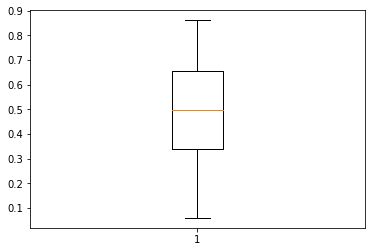

In [576]:
################Outlier Analysis###################

#saving numeric values#
cnames=["temp","atemp","hum","windspeed",]
#ploting boxplotto visualize outliers#
plt.boxplot(bike_train['temp'])


In [ ]:
plt.boxplot(bike_train['atemp'])

In [ ]:
plt.boxplot(bike_train['hum'])

In [ ]:
plt.boxplot(bike_train['windspeed'])

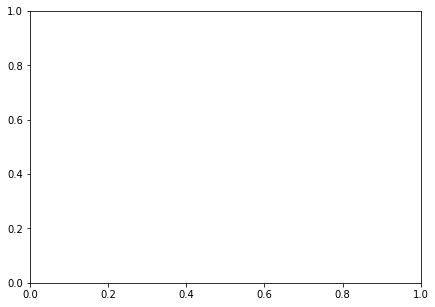

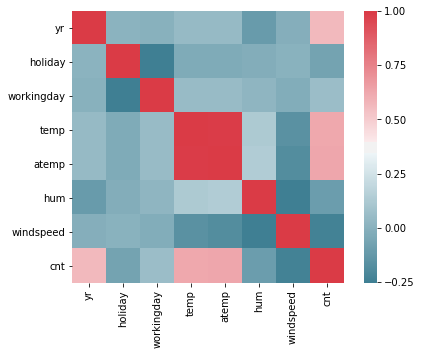

In [577]:
#############Feature Selection ##################
df_corr = bike_train
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [589]:
#droping corelated variable
bike_train = bike_train.drop(['atemp'], axis=1)

In [590]:
############Modeling ###############################

#dividing data into train and test
train, test = train_test_split(bike_train, test_size=0.2)

In [591]:
######c50#######
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11], train.iloc[:,11])
predictions_DT = fit_DT.predict(test.iloc[:,0:11])

In [592]:
#random forest
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:11], train.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11])


In [593]:
#linear regression
#creating dummy variable
data_lr=bike_train.copy()
cat_names = ["season", "dteday", "weathersit", "mnth","weekday"]
for i in cat_names:
    temp = pd.get_dummies(data_lr[i], prefix = i)
    data_lr = data_lr.join(temp)
fields_to_drop = ['dteday', 'season', 'weathersit', 'weekday', 'mnth','cnt']
data_lr = data_lr.drop(fields_to_drop, axis=1)
data_lr=data_lr.join(bike_train['cnt'])

In [594]:
trainlr, testlr = train_test_split(data_lr, test_size=0.2)
model = sm.OLS(trainlr.iloc[:,63], trainlr.iloc[:,0:63]).fit()
predictions_LR = model.predict(testlr.iloc[:,0:63])

In [595]:
#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [616]:
#MAPE for decision tree regression
MAPE(test.iloc[:,11], predictions_DT)

27.737837701228408

In [617]:
#MAPE for random forest regression
MAPE(test.iloc[:,11],RF_Predictions)

14.923072236915019

In [618]:
#MAPE for linear regression
MAPE(testlr.iloc[:,63], predictions_LR)

18.137949688224342

In [674]:
result=pd.DataFrame(test.iloc[:,0:11])
result['pred_cnt'] = (RF_Predictions)

result.to_csv("Random forest output python.csv",index=False)